In [1]:
import pandas as pd
from google.colab import drive
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
drive.mount('/content/drive/')

Mounted at /content/drive/


Функция для отбора признаков, оставляем только самые нужные.

In [2]:
def transform_to_predict(match_info):
    match_info['net_worth_diff'] = match_info['net_worth_team_1'] - match_info['net_worth_team_0']
    features = ['winning_team', 'net_worth_diff'] + [f'hero_id_{i}' for i in range(1, 13)] + ['tier1_lane1_0',
       'tier1_lane2_0', 'tier1_lane3_0', 'tier1_lane4_0', 'tier2_lane1_0',
       'tier2_lane2_0', 'tier2_lane3_0', 'tier2_lane4_0', 'titan_0', 'titan_shield_generator_1_0',
       'titan_shield_generator_2_0', 'barrack_boss_lane1_0',
       'barrack_boss_lane2_0', 'barrack_boss_lane3_0', 'barrack_boss_lane4_0',
       'tier1_lane1_1', 'tier1_lane2_1', 'tier1_lane3_1',
       'tier1_lane4_1', 'tier2_lane1_1', 'tier2_lane2_1', 'tier2_lane3_1',
       'tier2_lane4_1', 'titan_1', 'titan_shield_generator_1_1',
       'titan_shield_generator_2_1', 'barrack_boss_lane1_1',
       'barrack_boss_lane2_1', 'barrack_boss_lane3_1', 'barrack_boss_lane4_1']

    return match_info[features]

Загружаем датасет и применяем вышенаписанную функцию.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/deadlock_data/clean_data.csv')
df = transform_to_predict(df)
df

,winning_team,net_worth_diff,hero_id_1,hero_id_2,hero_id_3,hero_id_4,hero_id_5,hero_id_6,hero_id_7,hero_id_8,...,tier2_lane2_1,tier2_lane3_1,tier2_lane4_1,titan_1,titan_shield_generator_1_1,titan_shield_generator_2_1,barrack_boss_lane1_1,barrack_boss_lane2_1,barrack_boss_lane3_1,barrack_boss_lane4_1
0,0.0,0,19,4,20,50,1,13,17,10,...,True,True,True,True,True,True,True,True,True,True
1,0.0,-935,19,4,20,50,1,13,17,10,...,True,True,True,True,True,True,True,True,True,True
2,0.0,937,19,4,20,50,1,13,17,10,...,True,True,True,True,True,True,True,True,True,True
3,0.0,204,19,4,20,50,1,13,17,10,...,True,True,True,True,True,True,True,True,True,True
4,0.0,1175,19,4,20,50,1,13,17,10,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530265,0.0,-11384,52,27,1,4,2,19,11,12,...,True,False,False,True,True,True,True,True,True,True
2530266,0.0,-10752,52,27,1,4,2,19,11,12,...,True,False,False,True,True,True,True,True,True,True
2530267,0.0,-13401,52,27,1,4,2,19,11,12,...,True,False,False,True,True,True,True,True,True,True
2530268,0.0,-16943,52,27,1,4,2,19,11,12,...,False,False,False,True,True,True,True,True,True,True


Посмотрим на корреляции между признаками и целевой переменной.

<Axes: >

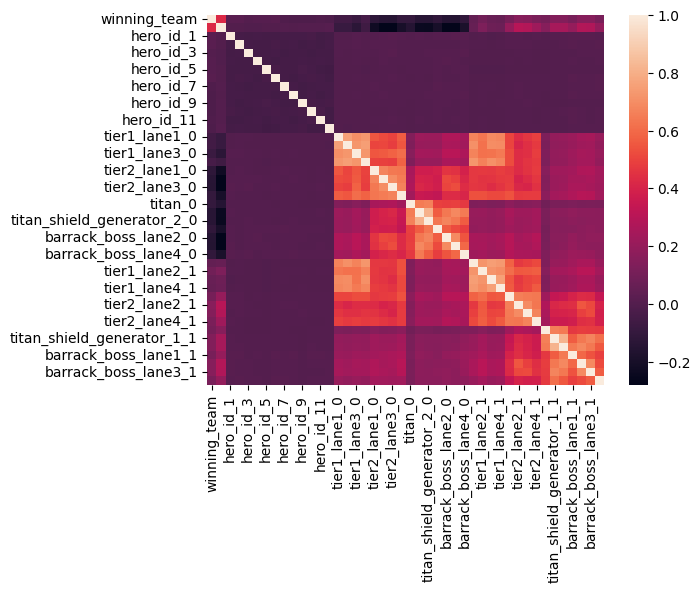

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

Перемешиваем данные и делим их на тренировочную и тестовую выборки.

Создаем модель градиентного бустинга и тренируем его.

In [4]:
df = df.sample(frac=1)

X, y = df.drop(['winning_team'], axis=1), df['winning_team']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

Смотрим значение ROC-AUC полученной модели на выборках.

In [7]:
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

print(f'train acc: {roc_auc_score(y_train, train_pred):.2f}')
print(f'test acc: {roc_auc_score(y_test, test_pred):.2f}')

train acc: 0.70
test acc: 0.70


Получили 0.7 на обеих выборках, что уже довольно неплохо. Возможно, изменение структуры деревьев в градиентном бустинге улучшат результат. (TODO)

Сохраняем полученную модель для дальнейшего использования.

In [8]:
from joblib import dump
dump(clf, 'model.joblib', compress=9)

['model.joblib']